In [15]:
import os, sys
root_dir = os.path.dirname(os.getcwd())
sys.path.append(root_dir)

import pandas as pd
import matplotlib.pyplot as plt
from configs import model_size, support_models, get_model_category
import numpy as np

df  = pd.read_pickle(f"{root_dir}/results/results.pkl")

df.head()

,_runtime,_step,_timestamp,_wandb,accuracy,seed,wandb,api_key,eval_mode,overwrite,model_name,description,n_per_class,prompt_name,dataset_name,max_new_tokens,run_name,run_id
0,9.677576,0.0,1.727936e+09,{'runtime': 9},0.250,42,True,yz,single,True,gpt-4o-mini,,2,yn,memotion,NaN,frosty-oath-5,fryv8q8r
1,150.268406,0.0,1.727937e+09,{'runtime': 150},0.500,42,True,yz,single,True,gpt-4o-mini,,50,yn,memotion,NaN,lucky-moon-6,zog6po9e
2,423.607283,0.0,1.727937e+09,{'runtime': 423},0.000,42,True,yz,single,False,Llama-3.2-90B-Vision-Instruct,,2,yn,memotion,NaN,driven-forest-7,jjpnrfnu
3,114.574776,0.0,1.727937e+09,{'runtime': 114},0.560,42,True,yz,single,True,claude-3-sonnet-20240229,,50,yn,memotion,NaN,zany-field-8,tre6uqym
4,555.219650,0.0,1.727938e+09,{'runtime': 555},0.515,42,True,yz,single,False,Llama-3.2-90B-Vision-Instruct,,100,yn,memotion,NaN,scarlet-dream-9,eu2yqz7u


In [20]:
# Reload the get_model_category function to ensure we have the latest version
import importlib
import configs
importlib.reload(configs)
from configs import get_model_category

# Verify that the function has been reloaded
print("get_model_category function reloaded.")


get_model_category function reloaded.


In [6]:
def get_row(**kwargs):
    condition = None
    for key, value in kwargs.items():

        if condition is None:
            condition = df[key] == value
        else:
            condition &= df[key] == value
    return df[condition].reset_index(drop=True)

# Standard, Multimodal, Pairwise

In [7]:
smp_df = get_row(dataset_name='ours_v2', prompt_name='standard', eval_mode='pairwise', description = '')
smp_df

,_runtime,_step,_timestamp,_wandb,accuracy,seed,wandb,api_key,eval_mode,overwrite,model_name,description,n_per_class,prompt_name,dataset_name,max_new_tokens,run_name,run_id
0,2.172058,0.0,1.728890e+09,{'runtime': 2},0.400000,42,True,yz,pairwise,False,gpt-4o-mini,,35,standard,ours_v2,NaN,graceful-river-29,zahai4v6
1,1.822208,0.0,1.728934e+09,{'runtime': 1},0.371429,42,True,yz,pairwise,False,claude-3-haiku-20240307,,35,standard,ours_v2,NaN,gallant-firebrand-36,rhfkxue8
2,105.209812,0.0,1.729021e+09,{'runtime': 105},0.142857,42,True,yz,pairwise,True,Qwen2-VL-2B-Instruct,,35,standard,ours_v2,NaN,youthful-jazz-48,nka0wy26
3,108.960573,0.0,1.729029e+09,{'runtime': 109},0.457143,42,True,yz,pairwise,True,Qwen2-VL-7B-Instruct,,35,standard,ours_v2,1000.0,apricot-wildflower-59,2tcqobpu
4,901.895367,0.0,1.729048e+09,{'runtime': 901},0.885714,42,True,yz,pairwise,True,Qwen2-VL-72B-Instruct,,35,standard,ours_v2,1000.0,olive-bee-64,dowmtbuo
5,59.545194,0.0,1.729054e+09,{'runtime': 59},0.600000,42,True,yz,pairwise,False,Pixtral-12B-2409,,35,standard,ours_v2,1000.0,soft-pine-76,152fl6ka
6,399.368116,0.0,1.729188e+09,{'runtime': 399},0.000000,42,True,yz,pairwise,True,Llama-3.2-90B-Vision-Instruct,,35,standard,ours_v2,1000.0,misty-water-121,bwph7dyr
7,305.330009,0.0,1.729188e+09,{'runtime': 305},0.000000,42,True,yz,pairwise,True,Llama-3.2-11B-Vision-Instruct,,35,standard,ours_v2,1000.0,avid-snowflake-122,83uxtcwp


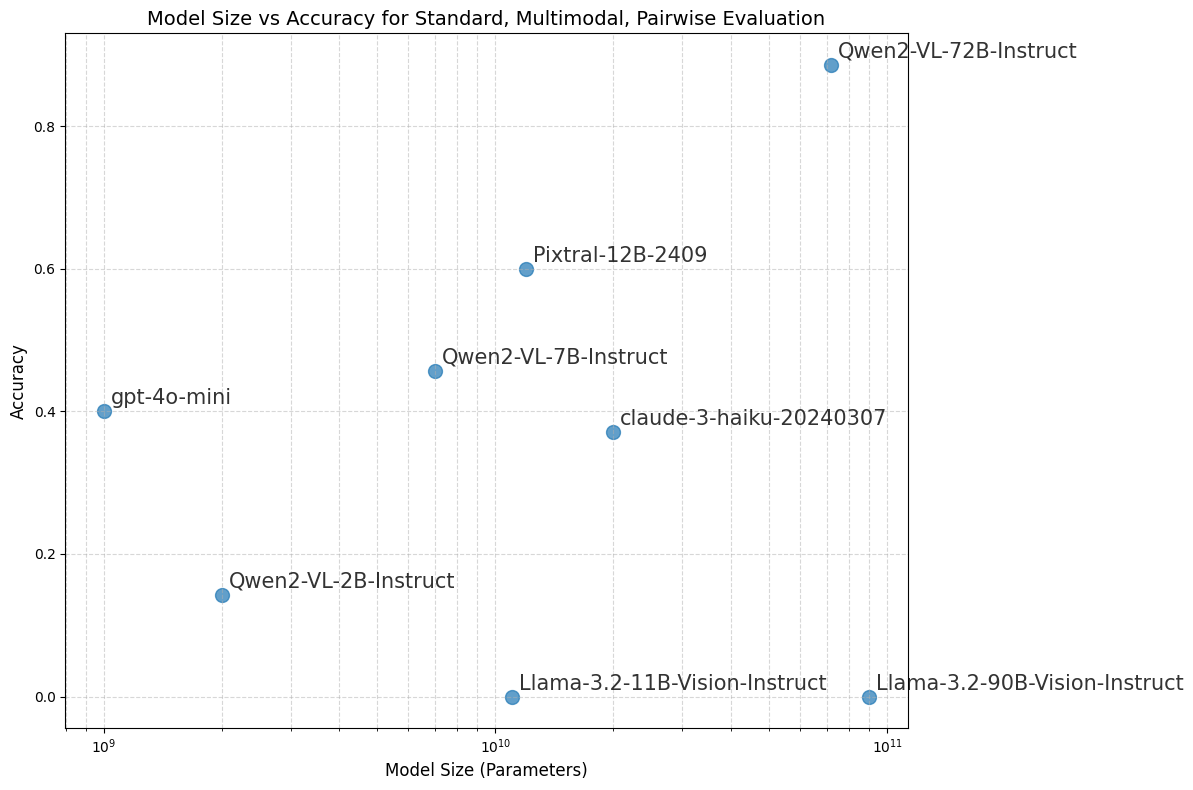

In [9]:
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Prepare data for plotting
x = [model_size[model] for model in smp_df['model_name']]
y = smp_df['accuracy']

# Create the scatter plot
scatter = ax.scatter(x, y, alpha=0.7, s=100)

# Set x-axis to logarithmic scale
ax.set_xscale('log')

# Set labels and title
ax.set_xlabel('Model Size (Parameters)', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Model Size vs Accuracy for Standard, Multimodal, Pairwise Evaluation', fontsize=14)

# Add grid lines
ax.grid(True, which="both", ls="--", alpha=0.5)

# Annotate each point with the model name
for i, model in enumerate(smp_df['model_name']):
    ax.annotate(model, (x[i], y[i]), xytext=(5, 5), textcoords='offset points', fontsize=15, alpha=0.8)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


posx and posy should be finite values
posx and posy should be finite values


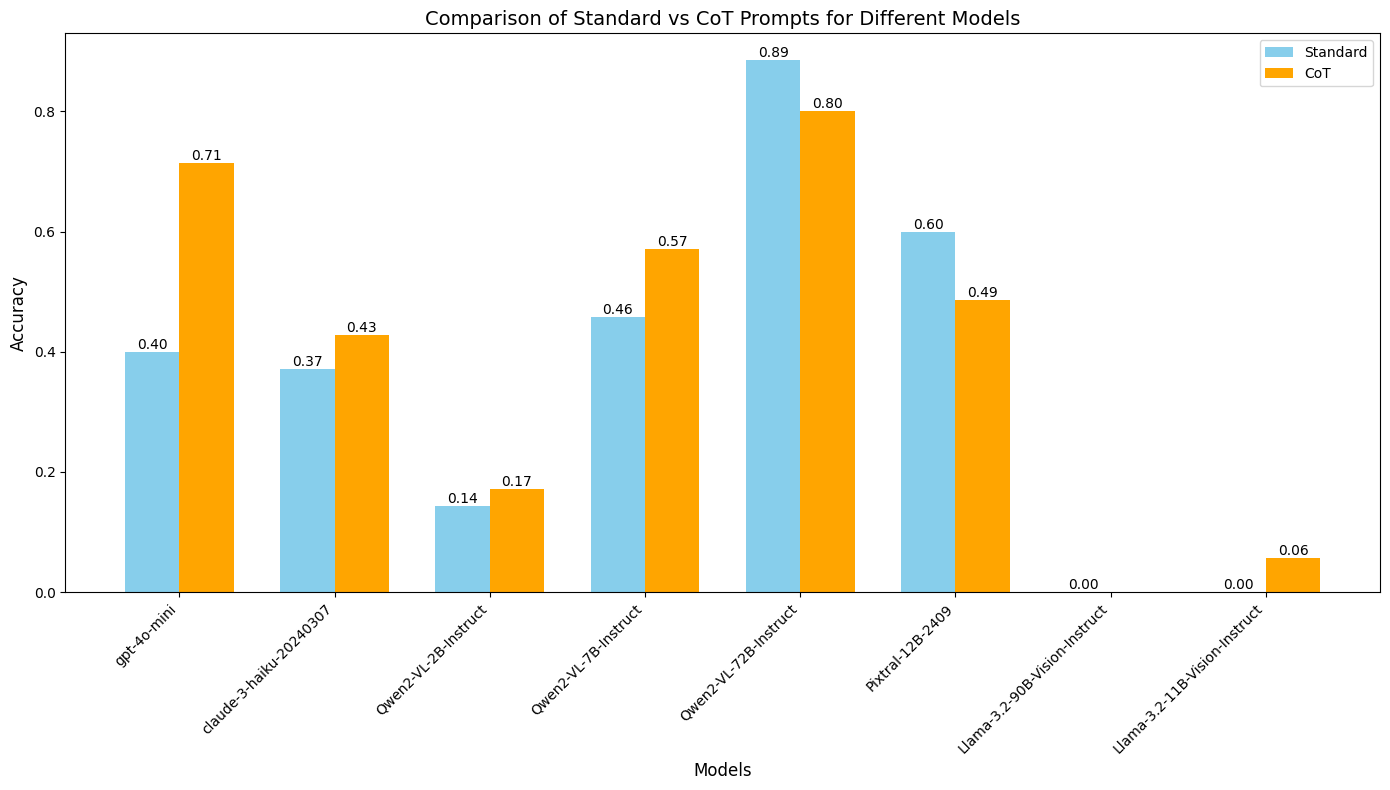

In [11]:
# Get data for standard and cot prompts
standard_df = get_row(dataset_name='ours_v2', prompt_name='standard', eval_mode='pairwise', description='')
cot_df = get_row(dataset_name='ours_v2', prompt_name='cot', eval_mode='pairwise', description='')

# Merge dataframes
merged_df = pd.merge(standard_df, cot_df, on='model_name', suffixes=('_standard', '_cot'))

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Set width of each bar and positions of the bars
bar_width = 0.35
r1 = np.arange(len(merged_df))
r2 = [x + bar_width for x in r1]

# Create the grouped bar plot
ax.bar(r1, merged_df['accuracy_standard'], color='skyblue', width=bar_width, label='Standard')
ax.bar(r2, merged_df['accuracy_cot'], color='orange', width=bar_width, label='CoT')

# Customize the plot
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Comparison of Standard vs CoT Prompts for Different Models', fontsize=14)
ax.set_xticks([r + bar_width/2 for r in range(len(merged_df))])
ax.set_xticklabels(merged_df['model_name'], rotation=45, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(merged_df['accuracy_standard']):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')
for i, v in enumerate(merged_df['accuracy_cot']):
    ax.text(i + bar_width, v, f'{v:.2f}', ha='center', va='bottom')

# Add legend
ax.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [17]:
smp_all_df = get_row(dataset_name='ours_v2', prompt_name='standard', eval_mode='pairwise')

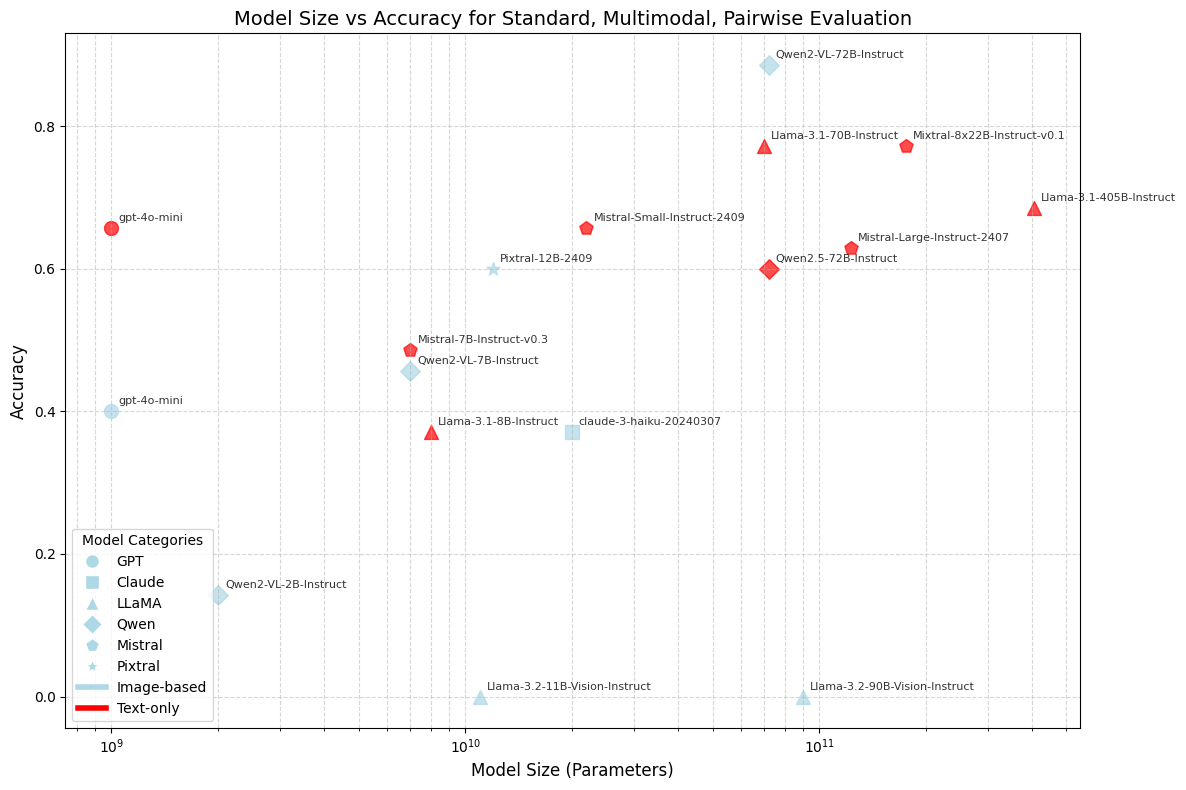

In [23]:
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Prepare data for plotting
x_values = [model_size[model] for model in smp_all_df['model_name']]
y_values = smp_all_df['accuracy']
descriptions = smp_all_df['description']

# Define markers for each model category
markers = {
    'gpt': 'o',
    'claude': 's',
    'llama': '^',
    'qwen': 'D',
    'mistral': 'p',
    'pixtral': '*'
}

# Create scatter plots for each model category
for category in support_models:
    category_mask = [get_model_category(model) == category for model in smp_all_df['model_name']]
    x_category = [x for x, mask in zip(x_values, category_mask) if mask]
    y_category = [y for y, mask in zip(y_values, category_mask) if mask]
    models_category = [model for model, mask in zip(smp_all_df['model_name'], category_mask) if mask]
    descriptions_category = [desc for desc, mask in zip(descriptions, category_mask) if mask]
    
    # Separate data points based on description
    x_default = [x for x, desc in zip(x_category, descriptions_category) if desc == '']
    y_default = [y for y, desc in zip(y_category, descriptions_category) if desc == '']
    x_llama = [x for x, desc in zip(x_category, descriptions_category) if desc == 'Llama-3.2-90B-Vision-Instruct']
    y_llama = [y for y, desc in zip(y_category, descriptions_category) if desc == 'Llama-3.2-90B-Vision-Instruct']
    
    # Plot default description points
    scatter_default = ax.scatter(x_default, y_default, alpha=0.7, s=100, marker=markers[category], label=f"{category} (Default)", color = 'lightblue')
    
    # Plot Llama description points with a different color
    scatter_llama = ax.scatter(x_llama, y_llama, alpha=0.7, s=100, marker=markers[category], label=f"{category} (Llama)", color='red')
    
    # Annotate each point with the model name
    for x, y, model, desc in zip(x_category, y_category, models_category, descriptions_category):
        if desc == '' or desc == 'Llama-3.2-90B-Vision-Instruct':
            ax.annotate(model, (x, y), xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.8)

# Set x-axis to logarithmic scale
ax.set_xscale('log')

# Set labels and title
ax.set_xlabel('Model Size (Parameters)', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Model Size vs Accuracy for Standard, Multimodal, Pairwise Evaluation', fontsize=14)

# Add grid lines
ax.grid(True, which="both", ls="--", alpha=0.5)

# Add legend
# Create custom legend entries
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='GPT', markerfacecolor='lightblue', markersize=10),
    plt.Line2D([0], [0], marker='s', color='w', label='Claude', markerfacecolor='lightblue', markersize=10),
    plt.Line2D([0], [0], marker='^', color='w', label='LLaMA', markerfacecolor='lightblue', markersize=10),
    plt.Line2D([0], [0], marker='D', color='w', label='Qwen', markerfacecolor='lightblue', markersize=10),
    plt.Line2D([0], [0], marker='p', color='w', label='Mistral', markerfacecolor='lightblue', markersize=10),
    plt.Line2D([0], [0], marker='*', color='w', label='Pixtral', markerfacecolor='lightblue', markersize=10),
    plt.Line2D([0], [0], color='lightblue', lw=4, label='Image-based'),
    plt.Line2D([0], [0], color='red', lw=4, label='Text-only')
]

# Add the legend to the plot
ax.legend(handles=legend_elements, loc='best', title='Model Categories')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


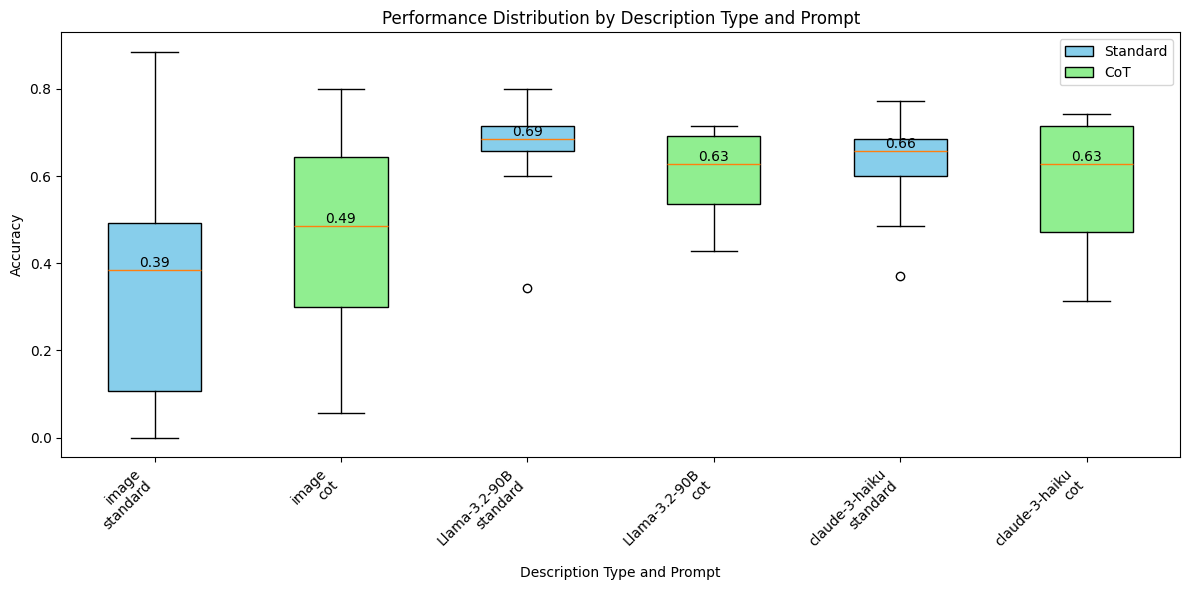

In [38]:
# Assuming df is your DataFrame with the data

# Prepare data for box plot
data_to_plot = [
    get_row(dataset_name='ours_v2', prompt_name=prompt, eval_mode='pairwise', description=desc)['accuracy'].dropna().tolist()
    for desc in df['description'].unique()
    for prompt in ['standard', 'cot']
]

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Create box plot
bp = ax.boxplot(data_to_plot, patch_artist=True)

# Customize box colors
colors = ['skyblue', 'lightgreen'] * 3
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Add labels and title
ax.set_xlabel('Description Type and Prompt')
ax.set_ylabel('Accuracy')
ax.set_title('Performance Distribution by Description Type and Prompt')

# Set x-axis labels
labels = [f"{desc}\n{prompt}" for desc in ['image', 'Llama-3.2-90B', 'claude-3-haiku'] for prompt in ['standard', 'cot']]
ax.set_xticklabels(labels, rotation=45, ha='right')

# Add a legend
ax.legend([bp['boxes'][0], bp['boxes'][1]], ['Standard', 'CoT'], loc='upper right')

# Show median values
medians = [np.median(data) for data in data_to_plot]
for i, median in enumerate(medians):
    ax.text(i+1, median, f'{median:.2f}', horizontalalignment='center', verticalalignment='bottom')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [37]:
get_row(dataset_name='ours_v2', prompt_name='cot', eval_mode='pairwise', description = '')

,_runtime,_step,_timestamp,_wandb,accuracy,seed,wandb,api_key,eval_mode,overwrite,model_name,description,n_per_class,prompt_name,dataset_name,max_new_tokens,run_name,run_id
0,2.476578,0.0,1.728890e+09,{'runtime': 2},0.714286,42,True,yz,pairwise,False,gpt-4o-mini,,35,cot,ours_v2,NaN,lively-thunder-28,4fdrd3dr
1,195.974919,0.0,1.728935e+09,{'runtime': 195},0.428571,42,True,yz,pairwise,False,claude-3-haiku-20240307,,35,cot,ours_v2,NaN,radiant-firebrand-37,c6xzlz3x
2,67.714362,0.0,1.728965e+09,{'runtime': 67},0.057143,42,True,yz,pairwise,False,Llama-3.2-11B-Vision-Instruct,,35,cot,ours_v2,NaN,happy-moon-40,os7ua29v
3,901.291593,0.0,1.729028e+09,{'runtime': 901},0.171429,42,True,yz,pairwise,True,Qwen2-VL-2B-Instruct,,35,cot,ours_v2,1000.0,clear-deluge-58,73ss76ak
4,1121.171540,0.0,1.729031e+09,{'runtime': 1121},0.571429,42,True,yz,pairwise,True,Qwen2-VL-7B-Instruct,,35,cot,ours_v2,1000.0,denim-cloud-60,jfptk8hn
5,698.159204,0.0,1.729053e+09,{'runtime': 698},0.800000,42,True,yz,pairwise,False,Qwen2-VL-72B-Instruct,,35,cot,ours_v2,1000.0,lucky-meadow-69,9e8ji5hr
6,61.281952,0.0,1.729056e+09,{'runtime': 61},0.485714,42,True,yz,pairwise,False,Pixtral-12B-2409,,35,cot,ours_v2,1000.0,avid-dream-81,a5tvtm79
7,NaN,NaN,NaN,NaN,NaN,42,True,yz,pairwise,True,Llama-3.2-90B-Vision-Instruct,,35,cot,ours_v2,1000.0,vital-universe-124,lq4ju9d5
